In [1]:
from pathlib import Path

import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt

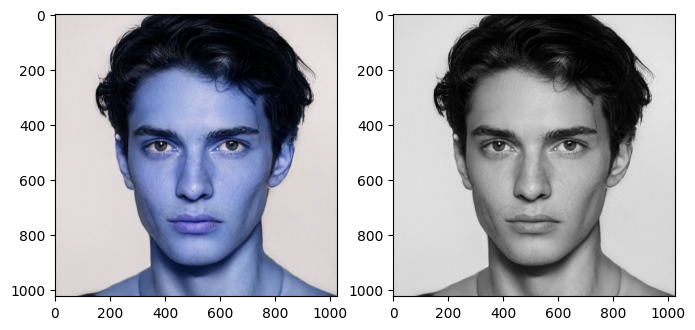

In [2]:
origin_img_path = Path("./img/src_img/man01.png")
origin_img = cv2.imread(str(origin_img_path))
gray_img = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(origin_img)
plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.show()

参考：

- [JPEG2000编码流程](https://blog.csdn.net/weixin_43876729/article/details/115485588)
- [小波变换原理与JPEG2000](https://blog.csdn.net/yh13572438258/article/details/121980301)
- [JPEG2000图像压缩算法学习](https://blog.csdn.net/weixin_45178274/article/details/129938384)
- [db97小波实现](file:///C:/UserData/Projects/Github/gpt_academic/gpt_log/default_user/chat_history/db97%E5%B0%8F%E6%B3%A2%E7%B3%BB%E6%95%B0.html)

In [3]:
# TODO：
# [ ]: 直流平移
# [ ]: 色彩分量变换
# [ ]: 使用不同的小波变换
# [ ]: 使用均匀标量量化
# [ ]: EBCOT编码
    # [ ]: Tier1 层编码
    # [ ]: Tier2 层编码
print("尝试使用Daubechies 9 / Daubechies 7 小波基来进行离散小波变换")

尝试使用Daubechies 9 / Daubechies 7 小波基来进行离散小波变换


In [4]:
# 直流平移
def dc_translation(img: np.ndarray, B: int=5) -> np.ndarray:
    """
    使样本值在小波变换后均勾分布在零系数的两侧便于进行自适应熵编码,
    需要对样本值进行平移就是所有样本值减去中间值.
    :param img: 图像数据
    :param B: 图像样本的精度
    :return: 平移后的图像
    out[x,y] = img[x,y] - 2^(B-1)
    """
    out = img - 2 ** (B-1)
    return out

a


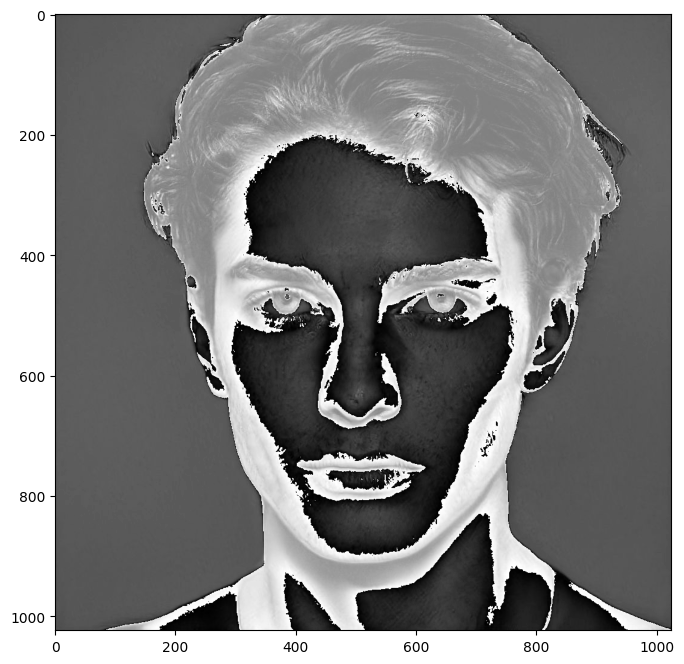

In [5]:
out_img = dc_translation(gray_img, B=8)
print("a")
plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')
plt.show()

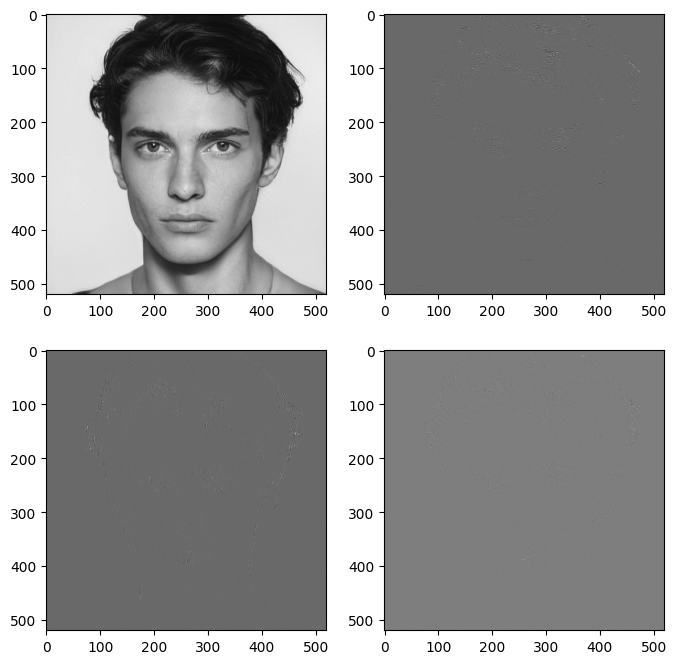

In [11]:
cA,(cH, cV, cD) = pywt.dwt2(gray_img, 'db9')

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(cA, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(cH, cmap='gray')
plt.subplot(2,2,3)
plt.imshow(cV, cmap='gray')
plt.subplot(2,2,4)
plt.imshow(cD, cmap='gray')
plt.show()